In [11]:
# Import required modules
import xlrd
import agate
from xlrd.sheet import ctype_text
import pprint
import matplotlib.pyplot as plt
import json

In [12]:
# Read the UNICEF workbook
workbook = xlrd.open_workbook('./data/hotdog-contest-winners.xlsm')
print("No of worksheets are:",workbook.nsheets)


No of worksheets are: 1


C:\Users\siris\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\Users\siris\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\Users\siris\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.


In [13]:
#Reading the first worksheet
sheet = workbook.sheets()[0]


#read the data rows and store in country_rows
country_rows = [sheet.row_values(r) for r in range(0, 32)]

import pandas as pd

df = pd.DataFrame(country_rows)
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Year,Winner,Dogs eaten,Country,New record
1,1980,Paul Siederman & Joe Baldini,9.1,United States,0
2,1981,Thomas DeBerry,11,United States,0
3,1982,Steven Abrams,11,United States,0
4,1983,Luis Llamas,19.5,Mexico,0
5,1984,Birgit Felden,9.5,Germany,0


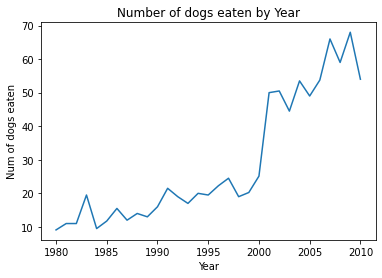

<Figure size 720x576 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import numpy as np

list1 = []
for i in df['New record']:
    if i == 1:
        list1.append('y')
    else:
        list1.append('b')
fig, ax = plt.subplots()
plt.plot(df['Year'],df['Dogs eaten'])
plt.xlabel('Year')
plt.ylabel('Num of dogs eaten')
plt.title('Number of dogs eaten by Year')
plt.figure(figsize=(10,8))
plt.show()

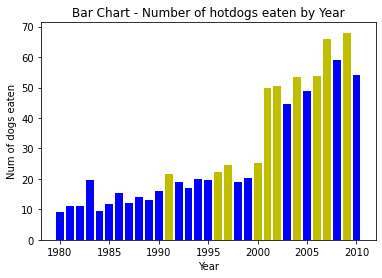

<Figure size 720x576 with 0 Axes>

In [74]:


list1 = []
for i in df['New record']:
    if i == 1:
        list1.append('y')
    else:
        list1.append('b')
fig, ax = plt.subplots()
ax.bar(df['Year'],df['Dogs eaten'], color=list1)
plt.xlabel('Year')
plt.ylabel('Num of dogs eaten')
plt.title('Bar Chart - Number of hotdogs eaten by Year')
plt.figure(figsize=(10,8))
plt.show()

In [71]:
df1 = df.groupby(['Country'])['Dogs eaten'].sum().reset_index()
df1 = df1.sort_values('Dogs eaten', ascending=True)

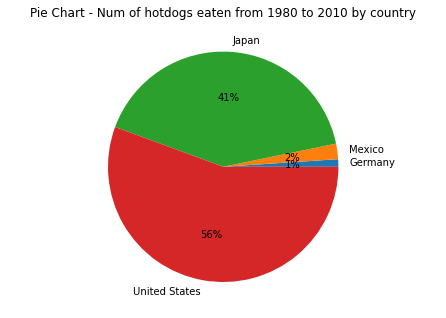

<Figure size 720x576 with 0 Axes>

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df1['Dogs eaten'], labels = df1['Country'],autopct='%1.0f%%')
plt.title('Pie Chart - Num of hotdogs eaten from 1980 to 2010 by country')
plt.figure(figsize=(10,8))
plt.show()

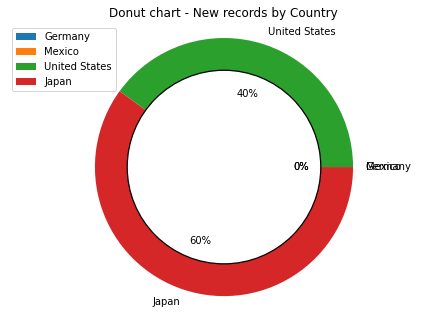

In [73]:
df2 = df.groupby(['Country'])['New record'].sum().reset_index()
df2 = df2.sort_values('New record', ascending=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df2['New record'], labels = df2['Country'],autopct='%1.0f%%')
plt.title('Donut chart - New records by Country')
plt.legend()

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  


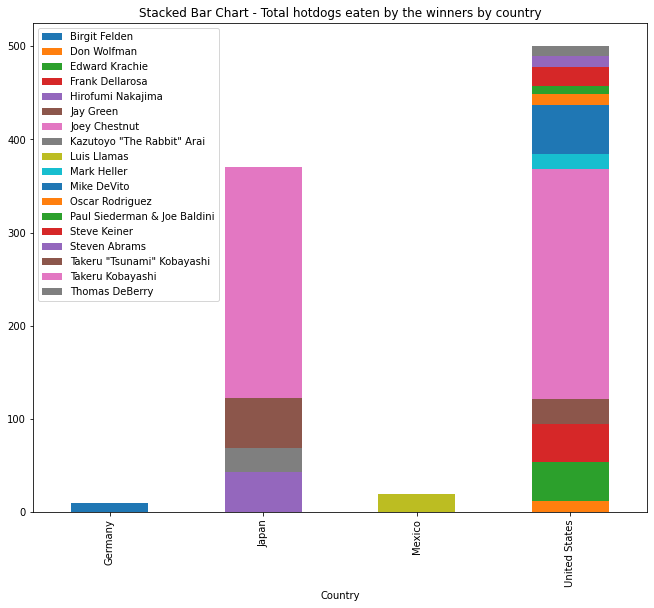

In [69]:
df3 = df.groupby(['Country', 'Winner'])['Dogs eaten'].sum().reset_index()

pt = df3.pivot('Country', 'Winner', 'Dogs eaten')

pt

pt.plot(kind='bar', stacked=True,figsize=(11, 9)).legend(loc='upper left')
plt.title('Stacked Bar Chart - Total hotdogs eaten by the winners by country')
plt.show()

#df.reset_index().pivot_table(index='Year', columns=['Country','Winner'], values='Dogs eaten')
                            
    
    #(kind='bar', stacked=True, figsize=(14, 6))
